**Predicting the Band Gap of Perovskites using Machine Learning**

In [ ]:
!pip3 install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.7/807.7 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 25.9 MB/s eta 0:00:00


In [ ]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen

In [ ]:
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
m = MPRester("QBuRLE3geGypctPx")

/usr/local/lib/python3.10/dist-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


In [ ]:
results = m.query({"formula_anonymous": "ABC3"}, properties=["cif", "band_gap"])

100%|██████████| 4358/4358 [00:02<00:00, 1517.08it/s]


In [ ]:
# Calculating the descriptor vector components:
# The atomic numbers of the elements:
mean_atomic_numbers = []
max_atomic_numbers = []
min_atomic_numbers = []
std_atomic_numbers = []

# Lattice parameters:
a_parameters = []
b_parameters = []
c_parameters = []
alpha_parameters = []
beta_parameters = []
gamma_parameters = []

# the distances between the elements:
mean_distance_matrix = []
max_distance_matrix = []
min_distance_matrix = []
std_distance_matrix = []

# bandgaps:
band_gaps = []

<ipython-input-6-7f4d671f54ff>:17: FutureWarning: get_structures is deprecated
get_structures is deprecated and will be removed in 2024. Use parse_structures instead.The only difference is that primitive defaults to False in the new parse_structures method.So parse_structures(primitive=True) is equivalent to the old behavior of get_structures().
  structure = parser.get_structures()[0]
/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1229: UserWarning: Issues encountered while parsing CIF: 16 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1229: UserWarning: Issues encountered while parsing CIF: 12 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/usr/local/lib/python3.10/dist-

1610


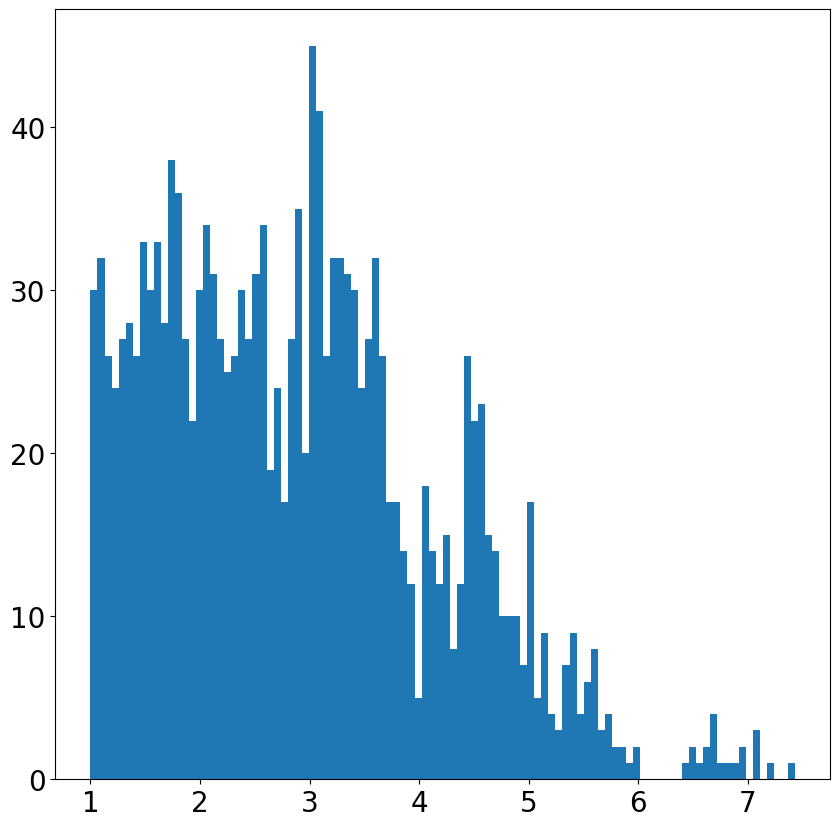

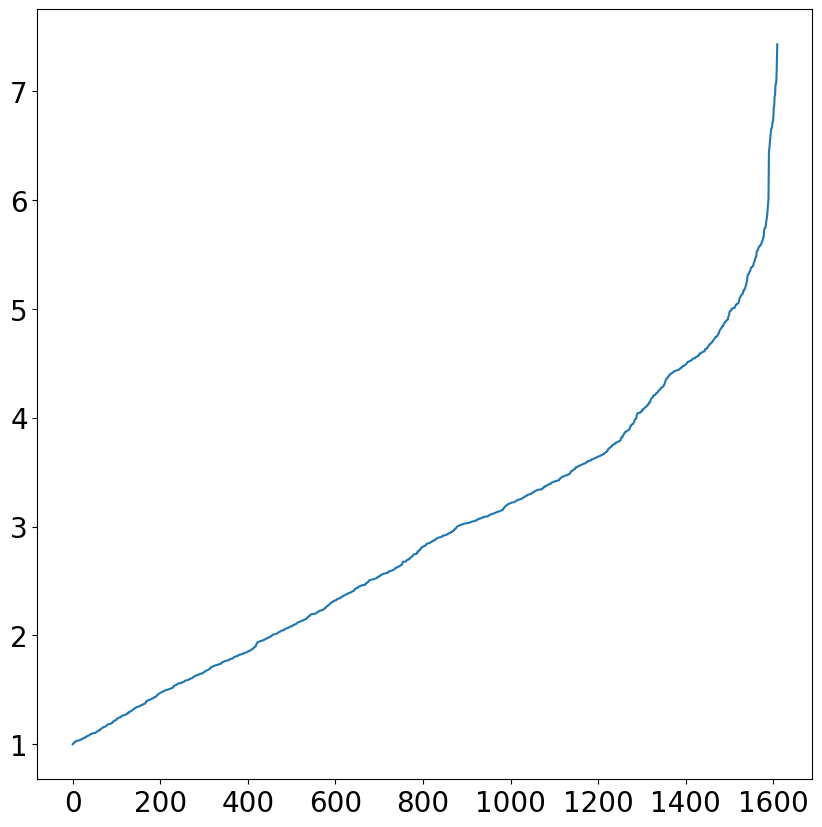

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
for r in results:
    cif = r['cif']
    bg = r['band_gap']
    if bg > 1 and bg < 8:
      import tempfile
      from pymatgen.io.cif import CifWriter

# Write the CIF data to a temporary file
      with tempfile.NamedTemporaryFile(mode='w') as temp_file:
        temp_file.write(cif)
        temp_file.flush()

    # Parse the CIF data from the temporary file
        parser = CifParser(temp_file.name)
        structure = parser.get_structures()[0]


      mean_atomic_numbers += [np.mean(structure.atomic_numbers)]
      max_atomic_numbers += [np.max(structure.atomic_numbers)]
      min_atomic_numbers += [np.min(structure.atomic_numbers)]
      std_atomic_numbers += [np.std(structure.atomic_numbers)]

      # Lattice parameters:
      a_parameters += [structure.lattice.abc[0]]
      b_parameters += [structure.lattice.abc[1]]
      c_parameters += [structure.lattice.abc[2]]
      alpha_parameters += [structure.lattice.angles[0]]
      beta_parameters += [structure.lattice.angles[1]]
      gamma_parameters += [structure.lattice.angles[2]]

      mean_distance_matrix += [np.mean(structure.distance_matrix)]
      max_distance_matrix += [np.max(structure.distance_matrix)]
      min_distance_matrix += [np.min(structure.distance_matrix)]
      std_distance_matrix += [np.std(structure.distance_matrix)]

      band_gaps += [bg]

# Number of band gaps:

print(len(band_gaps))

# Data visualization:

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.hist(band_gaps, bins=100)
plt.savefig('Histogram_PDF_NoMetals', bbox_inches='tight')

band_gaps_sorted=sorted(band_gaps)

# Scatter plot:
plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
plt.savefig('ScatterPlot_NoMetals', bbox_inches='tight')

In [ ]:
!pip3 install sklearn pandas
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Creating a pandas DataFrame object

dataset_df = pd.DataFrame({"mean_atomic_numbers": mean_atomic_numbers,
                           "max_atomic_numbers": max_atomic_numbers,
                           "min_atomic_numbers": min_atomic_numbers,
                           "std_atomic_numbers": std_atomic_numbers,
                           "a_parameters": a_parameters,
                           "b_parameters": b_parameters,
                           "c_parameters": c_parameters,
                           "alpha_parameters": alpha_parameters,
                           "beta_parameters": beta_parameters,
                           "gamma_parameters": gamma_parameters,
                           "mean_distance_matrix": mean_distance_matrix,
                           "max_distance_matrix": max_distance_matrix,
                           "min_distance_matrix": min_distance_matrix,
                           "std_distance_matrix": std_distance_matrix
                           })

# Normalizing the data using a scaler:

# Defining the scaler
scaler = StandardScaler().fit(dataset_df)

# Scaling the train set
scaled_dataset_df = scaler.transform(dataset_df)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Splitting the model into a Training set and Test set:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    scaled_dataset_df, band_gaps, test_size=.2, random_state=0)


RFG Model_1| r2_score: 0.4645
RFG Model_1| MSE: 0.9034


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:44:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBoost Model_2| r2_score: 0.4876
XGBoost Model_2| MSE: 0.8643
SVR Model_3| r2_score: 0.1158
SVR Model_3| MSE: 1.4915


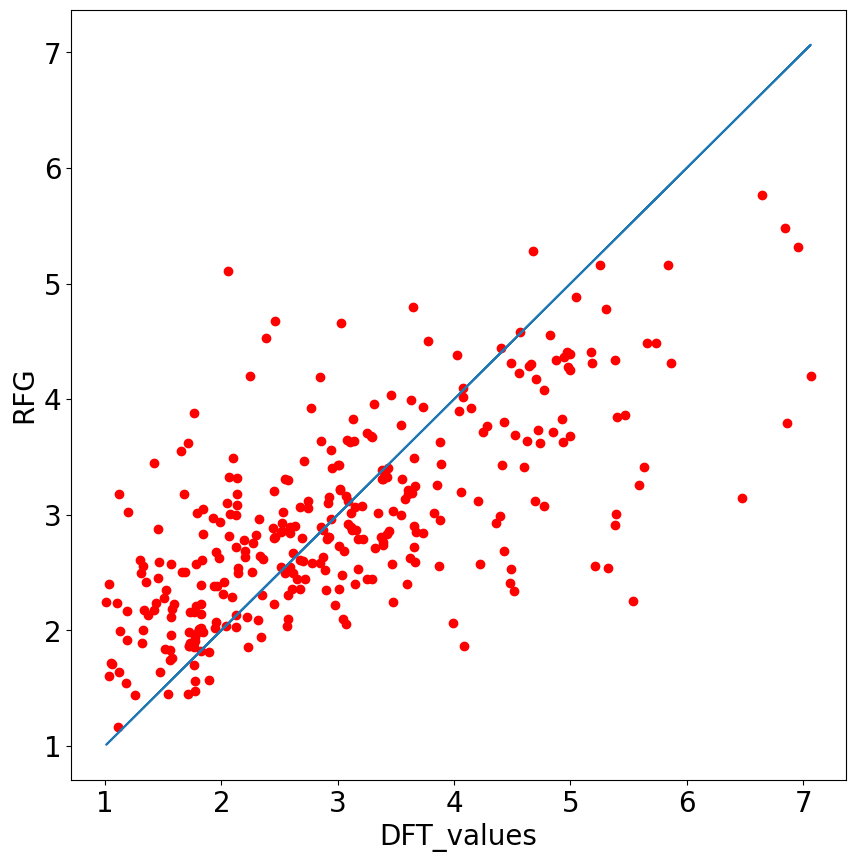

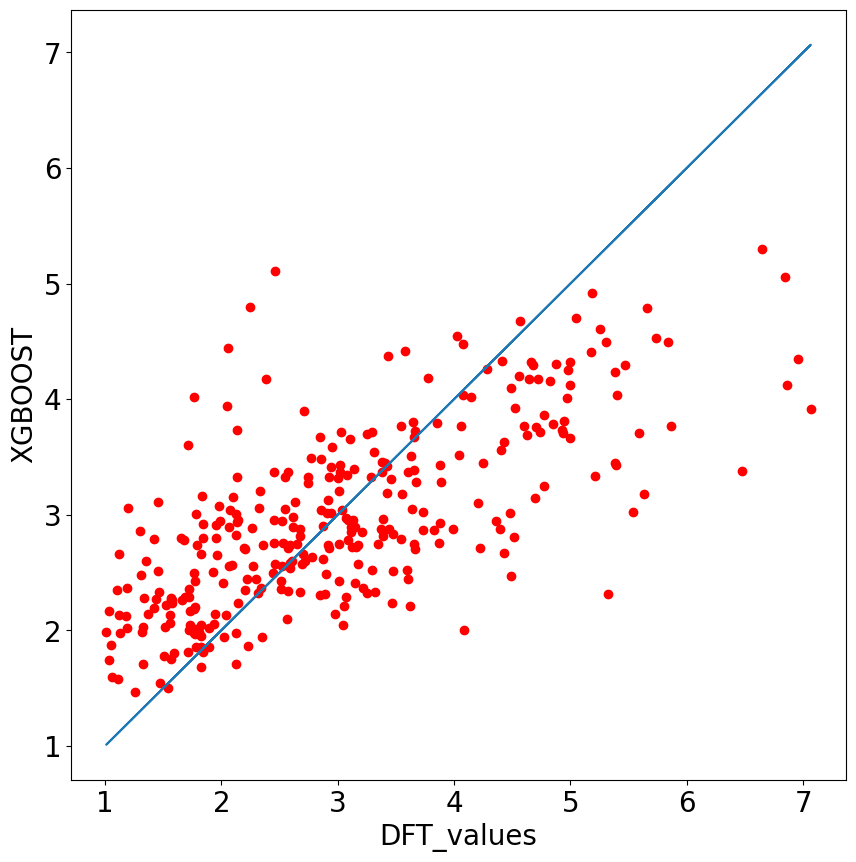

In [ ]:
!pip3 install xgboost

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Model 1: Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

print('RFG Model_1| r2_score: %.4f'% r2_score(y_test, y_pred))
print('RFG Model_1| MSE: %.4f'% mean_squared_error(y_test, y_pred))

# Visualizing the results:
xPlot=y_test
yPlot=y_pred
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RFG')
plt.xlabel('DFT_values')
plt.savefig('Random Forest Regression', bbox_inches='tight')

# Model 2: XGBoost
regressor = XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,
                    max_depth=400, alpha=10, n_estimators=400)
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

print('XGBoost Model_2| r2_score: %.4f'% r2_score(y_test, y_pred))
print('XGBoost Model_2| MSE: %.4f'% mean_squared_error(y_test, y_pred))

# Visualizing the results:
xPlot=y_test
yPlot=y_pred
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT_values')
plt.savefig('XGBOOST', bbox_inches='tight')

# Model 3: Support Vector Regression:

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


steps = [('scaler', StandardScaler()), ('SVM', SVR())]
pipeline = Pipeline(steps)
grid = GridSearchCV(pipeline, param_grid= {'SVM__C':[5], 'SVM__gamma':['auto'], 'SVM__kernel': ['rbf'],
                                           'SVM__epsilon':[0.001]}, cv=5)
grid.fit(X_train_scaled, y_train)
svr_score = grid.score(X_train_scaled,y_train)
svr_score1 = grid.score(X_test_scaled,y_test)
y_pred = grid.predict(X_test_scaled)

# Predicting the Test set results and evaluating the performance:
print('SVR Model_3| r2_score: %.4f'% svr_score1)
print('SVR Model_3| MSE: %.4f'% mean_squared_error(y_test, y_pred))


Hence the trained XGBoost model has the  highest accuracy for the given set of descriptors